# N-gram Language Model

In [1]:
# download text
import urllib

# url = 'http://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt'
url = 'https://raw.githubusercontent.com/Phylliida/Dialogue-Datasets/master/BNCCorpus.txt'

response = urllib.request.urlopen(url).read()
data = response.decode('utf-8')
for line in data.split("\n")[:8]:
    print(line)

You enjoyed yourself in America
Eh
did you
Oh I covered a nice tripyes
Oh very good
saw Mary and Andrew and
Yesyou did
in fact the whole family was together for Mary's wedding 


In [2]:
# tokenize
# but preserve turns
data = data.replace('\n', '\n ')

# split text into words
words = data.lower().split(' ')
print(words[:10])

['you', 'enjoyed', 'yourself', 'in', 'america\n', 'eh\n', 'did', 'you\n', 'oh', 'i']


In [3]:
# based on https://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139
from collections import *

ngram = 1

lm = defaultdict(Counter)

for i in range(len(words)-ngram):
    history, char = words[i:i+ngram], words[i+ngram]
    history = ' '.join(history)
    lm[history][char]+=1
    
for h in lm.items():
    print(h)
    break

('you', Counter({'know': 6045, 'can': 4130, 'want': 3282, "don't": 2454, 'get': 2281, 'got': 2173, 'have': 1982, 'see': 1904, 'know\n': 1862, '': 1535, '\n': 1461, "can't": 1422, 'go': 1367, 'do': 1280, 'think': 1237, 'were': 1169, 'could': 1115, 'like': 921, 'just': 905, 'had': 744, 'put': 738, 'are': 683, 'to': 682, 'going': 660, 'a': 653, 'see\n': 635, 'say': 615, 'said': 598, 'gonna': 587, 'should': 571, "haven't": 562, 'wanna': 561, 'need': 527, "didn't": 504, 'what': 479, 'and': 461, 'are\n': 454, 'come': 442, 'want\n': 441, 'might': 436, 'mean': 399, "won't": 381, 'look': 375, 'doing': 341, 'take': 337, 'remember': 331, 'seen': 323, 'do\n': 315, 'would': 312, 'in': 311, 'did': 306, "wouldn't": 303, 'gotta': 299, 'been': 283, 'mean\n': 276, 'the': 275, 'went': 271, 'go\n': 268, 'never': 264, 'ever': 260, 'doing\n': 255, 'tell': 254, 'very': 245, 'must': 240, 'hear': 236, 'say\n': 230, 'call': 230, 'will': 229, 'knowi': 221, 'on': 220, 'for': 219, 'not': 216, 'that': 213, 'feel': 

you ->


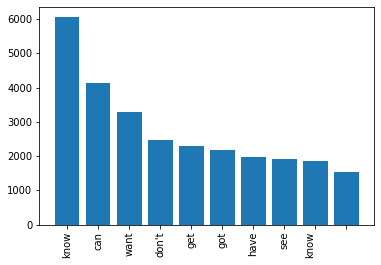

In [4]:
import matplotlib.pyplot as plt
from matplotlib import *

print(h[0], '->')

lists = h[1].most_common(10)
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation='vertical')       
plt.show()

In [5]:
def normalize(counter):
    s = float(sum(counter.values()))
    return [(c, cnt/s) for c, cnt in counter.most_common(100000)]

lm = {hist: normalize(chars) for hist, chars in lm.items()}

for h in lm.items():
    print(h)
    break

('you', [('know', 0.06574797154727981), ('can', 0.044919623240738726), ('want', 0.03569641730656283), ("don't", 0.026690739814230712), ('get', 0.024809118792282092), ('got', 0.023634465206325728), ('have', 0.021557068586717715), ('see', 0.020708707663527007), ('know\n', 0.020251897935655086), ('', 0.01669530791150943), ('\n', 0.015890452676687476), ("can't", 0.015466272215092123), ('go', 0.014868069000021753), ('do', 0.013921820278001349), ('think', 0.01345413412803724), ('were', 0.012714537425768418), ('could', 0.012127210632790238), ('like', 0.010017184746905657), ('just', 0.009843161993430641), ('had', 0.008092058036588284), ('put', 0.008026799504035153), ('are', 0.007428596288964782), ('to', 0.007417719866872593), ('going', 0.007178438580844445), ('a', 0.0071023036261991255), ('see\n', 0.006906528028539732), ('say', 0.00668899958669596), ('said', 0.006504100411128755), ('gonna', 0.006384459768114681), ('should', 0.0062104370146396646), ("haven't", 0.006112549215809967), ('wanna', 0

# Text Generation

In [6]:
from random import random

def sample_word(lm, history):
    dist = lm[history]
    x = random()
    for c, v in dist:
        x = x - v
        if x <= 0:
            return c

def generate_response(utterance, max_words=10):
    dialogue = [utterance.split()[-1] + '\n']
    for i in range(max_words):
        word = sample_word(lm, dialogue[-1])
        dialogue.append(word)
        if word:
            if word[-1] == '\n' or word == '\n':
                break
    dialogue.append('\n')
    print(' '.join(dialogue[1:]))

In [ ]:
while True:
    utterance = input()
    generate_response(utterance)

hi
come into  going in the  the accuracy of 

welcome here
tuesday
 

well
mhm
 

ok
alright
 

